In [2]:
import torch
torch.cuda.empty_cache()

In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd

In [4]:
gdsc_df = pd.read_csv("dataset/GDSC_SMILES_merged.csv", index_col=0)
gdsc_df

,DRUG_ID,DRUG_NAME,CELL_LINE_NAME,LN_IC50,SMILES
0,1003,Camptothecin,PFSK-1,-1.462148,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
1,1003,Camptothecin,A673,-4.869447,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
2,1003,Camptothecin,ES5,-3.360684,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
3,1003,Camptothecin,ES7,-5.045014,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
4,1003,Camptothecin,EW-11,-3.741620,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
...,...,...,...,...,...
242031,2499,N-acetyl cysteine,SNU-175,10.134495,CC(=O)NC(CS)C(=O)O
242032,2499,N-acetyl cysteine,SNU-407,8.575555,CC(=O)NC(CS)C(=O)O
242033,2499,N-acetyl cysteine,SNU-61,10.520666,CC(=O)NC(CS)C(=O)O
242034,2499,N-acetyl cysteine,SNU-C5,10.701430,CC(=O)NC(CS)C(=O)O


In [5]:
ccl_rep_df = pd.read_csv("dataset/PANCANCER_Genetic_feature.csv")

# Pivot to get binary matrix: rows = cell lines, columns = features
binary_feature_matrix = ccl_rep_df.pivot_table(
    index="cell_line_name",
    columns="genetic_feature",
    values="is_mutated",
    fill_value=0
).astype(int)

In [6]:
binary_feature_matrix.columns = binary_feature_matrix.columns.astype(str)

In [7]:
binary_feature_matrix

genetic_feature,ABCB1_mut,ABL2_mut,ACACA_mut,ACVR1B_mut,ACVR2A_mut,ADCY1_mut,AFF4_mut,AHCTF1_mut,AHNAK_mut,AKAP9_mut,...,cnaPANCAN90,cnaPANCAN91,cnaPANCAN92,cnaPANCAN93,cnaPANCAN94,cnaPANCAN95,cnaPANCAN96,cnaPANCAN97,cnaPANCAN98,cnaPANCAN99
cell_line_name,,,,,,,,,,,,,,,,,,,,,
201T,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
22RV1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23132-87,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42-MG-BA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
451Lu,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZR-75-30,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
huH-1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [8]:
binary_feature_matrix.index = binary_feature_matrix.index.str.upper()

In [9]:
import re

def clean_name(name):
    return re.sub(r'[^A-Za-z0-9]', '', name).upper()

### CCL embeddings

In [10]:
binary_feature_matrix.index = binary_feature_matrix.index.to_series().apply(clean_name)
binary_feature_matrix

genetic_feature,ABCB1_mut,ABL2_mut,ACACA_mut,ACVR1B_mut,ACVR2A_mut,ADCY1_mut,AFF4_mut,AHCTF1_mut,AHNAK_mut,AKAP9_mut,...,cnaPANCAN90,cnaPANCAN91,cnaPANCAN92,cnaPANCAN93,cnaPANCAN94,cnaPANCAN95,cnaPANCAN96,cnaPANCAN97,cnaPANCAN98,cnaPANCAN99
cell_line_name,,,,,,,,,,,,,,,,,,,,,
201T,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
22RV1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2313287,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42MGBA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
451LU,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZR7530,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
HUH1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


### Drugs

In [11]:
gdsc_df["CLEAN_CELL_LINE"] = gdsc_df["CELL_LINE_NAME"].apply(clean_name)
gdsc_df

,DRUG_ID,DRUG_NAME,CELL_LINE_NAME,LN_IC50,SMILES,CLEAN_CELL_LINE
0,1003,Camptothecin,PFSK-1,-1.462148,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,PFSK1
1,1003,Camptothecin,A673,-4.869447,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,A673
2,1003,Camptothecin,ES5,-3.360684,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,ES5
3,1003,Camptothecin,ES7,-5.045014,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,ES7
4,1003,Camptothecin,EW-11,-3.741620,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,EW11
...,...,...,...,...,...,...
242031,2499,N-acetyl cysteine,SNU-175,10.134495,CC(=O)NC(CS)C(=O)O,SNU175
242032,2499,N-acetyl cysteine,SNU-407,8.575555,CC(=O)NC(CS)C(=O)O,SNU407
242033,2499,N-acetyl cysteine,SNU-61,10.520666,CC(=O)NC(CS)C(=O)O,SNU61
242034,2499,N-acetyl cysteine,SNU-C5,10.701430,CC(=O)NC(CS)C(=O)O,SNUC5


### Fingerprints

In [12]:
def compute_morgan(smiles, radius=2, n_bits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return [0] * n_bits
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
    return list(fp)


In [13]:
unique_drugs = gdsc_df[["DRUG_ID", "SMILES"]].drop_duplicates().reset_index(drop=True)
unique_drugs["FINGERPRINT"] = unique_drugs["SMILES"].apply(compute_morgan)
fingerprint_dict = dict(zip(unique_drugs["DRUG_ID"], unique_drugs["FINGERPRINT"]))

# Creating Dataset

In [14]:
from rdkit import Chem
import torch
from torch_geometric.data import Data

from torch.utils.data import Dataset


In [15]:
# Define categorical vocabularies
ATOM_LIST = ['C', 'N', 'O', 'S', 'F', 'P', 'Cl', 'Br', 'I', 'H', 'B', 'Si', 'Na', 'K', 'Li', 'Mg', 'Ca', 'Fe', 'Zn', 'Se', 'Cu']
DEGREE_LIST = list(range(0, 11))
VALENCE_LIST = list(range(0, 7))
HYBRIDIZATION_LIST = [
    Chem.rdchem.HybridizationType.SP, Chem.rdchem.HybridizationType.SP2,
    Chem.rdchem.HybridizationType.SP3, Chem.rdchem.HybridizationType.SP3D,
    Chem.rdchem.HybridizationType.SP3D2
]
TOTAL_H_LIST = [0, 1, 2, 3, 4]
CHIRALITY_LIST = ['R', 'S']

In [16]:
def one_hot_encoding(x, allowable):
    return [int(x == s) for s in allowable]

In [17]:
def atom_features(atom):
    features = []
    features += one_hot_encoding(atom.GetSymbol(), ATOM_LIST)
    features += one_hot_encoding(atom.GetDegree(), DEGREE_LIST)
    features += one_hot_encoding(atom.GetImplicitValence(), VALENCE_LIST)
    features.append(atom.GetFormalCharge())
    features.append(atom.GetNumRadicalElectrons())
    features += one_hot_encoding(atom.GetHybridization(), HYBRIDIZATION_LIST)
    features.append(int(atom.GetIsAromatic()))
    features += one_hot_encoding(atom.GetTotalNumHs(), TOTAL_H_LIST)
    features.append(int(atom.IsInRing()))
    
    chirality = atom.GetProp('_CIPCode') if atom.HasProp('_CIPCode') else None
    features += one_hot_encoding(chirality, CHIRALITY_LIST)
    
    return features


In [18]:
def smiles_to_graph(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    
    atom_feats = [atom_features(atom) for atom in mol.GetAtoms()]
    x = torch.tensor(atom_feats, dtype=torch.float)

    edge_index = []
    for bond in mol.GetBonds():
        i = bond.GetBeginAtomIdx()
        j = bond.GetEndAtomIdx()
        edge_index.append((i, j))
        edge_index.append((j, i))  # undirected

    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    
    return Data(x=x, edge_index=edge_index)

In [19]:
class MGATAFDataset(Dataset):
    def __init__(self, gdsc_df, fingerprint_dict, cell_feature_matrix, graph_dict):
        self.df = gdsc_df
        self.fingerprint_dict = fingerprint_dict
        self.cell_features = cell_feature_matrix
        self.graphs = graph_dict
        self.clean = lambda x: re.sub(r'[^A-Za-z0-9]', '', x).upper()
    
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        drug_id = row["DRUG_ID"]
        cell_line_raw = row["CELL_LINE_NAME"]
        cell_line = self.clean(cell_line_raw)

        # Graph
        graph_data = self.graphs[drug_id]

        # Fingerprint → Tensor
        fingerprint = torch.tensor(self.fingerprint_dict[drug_id], dtype=torch.float)

        # Cell line features → Tensor
        ccl_feat = torch.tensor(self.cell_features.loc[cell_line].values, dtype=torch.float)

        # Label → Tensor
        ic50 = torch.tensor([row["LN_IC50"]], dtype=torch.float)

        return graph_data, fingerprint, ccl_feat, ic50


In [20]:
# Step 1: Clean the GDSC cell line column
gdsc_df["CELL_LINE_NAME_CLEAN"] = gdsc_df["CELL_LINE_NAME"].apply(clean_name)

# Step 2: Clean the index of the binary feature matrix
binary_feature_matrix.index = binary_feature_matrix.index.to_series().apply(clean_name)
binary_feature_matrix = binary_feature_matrix[~binary_feature_matrix.index.duplicated(keep='first')]

# Step 3: Filter only rows where:
# - drug_id in fingerprint_dict
# - cleaned cell line in binary_feature_matrix index
# - SMILES is not null (and possibly valid)

valid_drugs = set(fingerprint_dict.keys())
valid_cell_lines = set(binary_feature_matrix.index)

# Final filtering
gdsc_df = gdsc_df[
    gdsc_df["DRUG_ID"].isin(valid_drugs) &
    gdsc_df["CELL_LINE_NAME_CLEAN"].isin(valid_cell_lines) &
    gdsc_df["SMILES"].notna()
].reset_index(drop=True)

In [21]:
gdsc_df

,DRUG_ID,DRUG_NAME,CELL_LINE_NAME,LN_IC50,SMILES,CLEAN_CELL_LINE,CELL_LINE_NAME_CLEAN
0,1003,Camptothecin,PFSK-1,-1.462148,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,PFSK1,PFSK1
1,1003,Camptothecin,A673,-4.869447,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,A673,A673
2,1003,Camptothecin,ES5,-3.360684,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,ES5,ES5
3,1003,Camptothecin,ES7,-5.045014,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,ES7,ES7
4,1003,Camptothecin,EW-11,-3.741620,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,EW11,EW11
...,...,...,...,...,...,...,...
193910,2499,N-acetyl cysteine,SNU-175,10.134495,CC(=O)NC(CS)C(=O)O,SNU175,SNU175
193911,2499,N-acetyl cysteine,SNU-407,8.575555,CC(=O)NC(CS)C(=O)O,SNU407,SNU407
193912,2499,N-acetyl cysteine,SNU-61,10.520666,CC(=O)NC(CS)C(=O)O,SNU61,SNU61
193913,2499,N-acetyl cysteine,SNU-C5,10.701430,CC(=O)NC(CS)C(=O)O,SNUC5,SNUC5


In [22]:
binary_feature_matrix

genetic_feature,ABCB1_mut,ABL2_mut,ACACA_mut,ACVR1B_mut,ACVR2A_mut,ADCY1_mut,AFF4_mut,AHCTF1_mut,AHNAK_mut,AKAP9_mut,...,cnaPANCAN90,cnaPANCAN91,cnaPANCAN92,cnaPANCAN93,cnaPANCAN94,cnaPANCAN95,cnaPANCAN96,cnaPANCAN97,cnaPANCAN98,cnaPANCAN99
cell_line_name,,,,,,,,,,,,,,,,,,,,,
201T,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
22RV1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2313287,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42MGBA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
451LU,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZR7530,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
HUH1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [23]:
drug_smiles = gdsc_df.drop_duplicates(subset="DRUG_ID")[["DRUG_ID", "SMILES"]]

In [24]:
precomputed_graphs = {}
for _, row in drug_smiles.iterrows():
    drug_id = row["DRUG_ID"]
    smi = row["SMILES"]
    graph = smiles_to_graph(smi)
    if graph is not None:
        precomputed_graphs[drug_id] = graph

In [25]:
dataset = MGATAFDataset(
    gdsc_df=gdsc_df,
    fingerprint_dict=fingerprint_dict,
    cell_feature_matrix=binary_feature_matrix,
    graph_dict=precomputed_graphs
)

In [26]:
sample = dataset[0]
graph, fingerprint, cell_feat, label = sample

print("Graph:")
print(graph)
print("Graph node features shape:", graph.x.shape)
print("Graph edge_index shape:", graph.edge_index.shape)
print()

print("Fingerprint shape:", fingerprint.shape)
print("Cell line features shape:", cell_feat.shape)
print("Label (ln_IC50):", label)


Graph:
Data(x=[26, 55], edge_index=[2, 60])
Graph node features shape: torch.Size([26, 55])
Graph edge_index shape: torch.Size([2, 60])

Fingerprint shape: torch.Size([2048])
Cell line features shape: torch.Size([735])
Label (ln_IC50): tensor([-1.4621])


In [27]:
from torch_geometric.data import Batch

def mgataf_collate_fn(batch):
    graphs, fingerprints, ccl_feats, labels = zip(*batch)

    # Batch graph objects using PyG's helper
    graph_batch = Batch.from_data_list(graphs)

    # Stack everything else as tensors
    fingerprint_batch = torch.stack(fingerprints)
    ccl_feat_batch = torch.stack(ccl_feats)
    label_batch = torch.stack(labels)

    return graph_batch, fingerprint_batch, ccl_feat_batch, label_batch


# Model Build

## Encoding

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv, global_add_pool

In [29]:
class DrugGraphEncoder(nn.Module):
    def __init__(self, in_dim, hidden_dim=64, out_dim=128, num_layers=3, heads=4):
        super().__init__()
        self.gats = nn.ModuleList()
        self.num_layers = num_layers
        self.att_proj = nn.Linear(hidden_dim, 1)

        self.gats.append(GATConv(in_dim, hidden_dim, heads=heads, concat=False))
        for _ in range(1, num_layers):
            self.gats.append(GATConv(hidden_dim, hidden_dim, heads=heads, concat=False))

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        layer_outputs = []

        for gat in self.gats:
            x = F.relu(gat(x, edge_index))
            pooled = global_add_pool(x, batch)
            layer_outputs.append(pooled)

        h = torch.stack(layer_outputs, dim=1)  # [B, L, D]
        attn_weights = F.softmax(self.att_proj(h).squeeze(-1), dim=1)  # [B, L]
        h_weighted = (h * attn_weights.unsqueeze(-1)).sum(dim=1)  # [B, D]
        return h_weighted

In [30]:
class FingerprintEncoder(nn.Module):
    def __init__(self, in_dim=2048, out_dim=128):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(1, 32, kernel_size=8, stride=4),
            nn.ReLU(),
            nn.Conv1d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
        )

        # Dummy pass to infer output size
        with torch.no_grad():
            dummy = torch.zeros(1, 1, in_dim)
            conv_out = self.conv(dummy)
            conv_flat_dim = conv_out.view(1, -1).shape[1]

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(conv_flat_dim, out_dim),
            nn.ReLU()
        )

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.conv(x)
        x = self.fc(x)
        return x


In [31]:
class CellLineEncoder(nn.Module):
    def __init__(self, in_dim=735, out_dim=128):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(1, 32, kernel_size=8, stride=4),
            nn.ReLU(),
            nn.Conv1d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
        )

        # Dynamically infer flattened dimension
        with torch.no_grad():
            dummy = torch.zeros(1, 1, in_dim)
            conv_out = self.conv(dummy)
            flat_dim = conv_out.view(1, -1).shape[1]

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(flat_dim, out_dim),
            nn.ReLU()
        )

    def forward(self, x):
        x = x.unsqueeze(1)  # [B, 1, 735]
        x = self.conv(x)
        x = self.fc(x)
        return x


## Adaptive Fusion

In [32]:
class AdaptiveFusion(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.gate_layer = nn.Sequential(
            nn.Linear(input_dim * 2, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x1, x2):
        # x1: drug + fp, x2: ccl
        concat = torch.cat([x1, x2], dim=1)
        gate = self.gate_layer(concat)

        fused = gate * x1 + (1 - gate) * x2
        return fused


## Final Dense Layer

In [33]:
class IC50Predictor(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.fc(x)


## Complete Model

In [34]:
class MGATAFModel(nn.Module):
    def __init__(self, atom_feat_dim=55, fingerprint_dim=2048, ccl_dim=735, hidden_dim=128):
        super().__init__()
        self.drug_encoder = DrugGraphEncoder(in_dim=atom_feat_dim, hidden_dim=hidden_dim)
        self.fp_encoder = FingerprintEncoder(in_dim=fingerprint_dim, out_dim=hidden_dim)
        self.ccl_encoder = CellLineEncoder(in_dim=ccl_dim, out_dim=hidden_dim)
        self.fusion = AdaptiveFusion(input_dim=hidden_dim, hidden_dim=hidden_dim)
        self.regressor = IC50Predictor(input_dim=hidden_dim)

    def forward(self, graph_data, fingerprint, ccl_feat):
        drug_repr = self.drug_encoder(graph_data)
        fp_repr = self.fp_encoder(fingerprint)
        drug_combined = drug_repr + fp_repr

        ccl_repr = self.ccl_encoder(ccl_feat)
        fused = self.fusion(drug_combined, ccl_repr)

        return self.regressor(fused)


# Training

### Data Split

In [35]:
from sklearn.model_selection import train_test_split

indices = list(range(len(dataset)))
train_idx, test_idx = train_test_split(indices, test_size=0.1, random_state=42)
train_idx, val_idx = train_test_split(train_idx, test_size=0.1, random_state=42)

from torch.utils.data import Subset
train_set = Subset(dataset, train_idx)
val_set = Subset(dataset, val_idx)
test_set = Subset(dataset, test_idx)

### Creating DataLoaders

In [36]:
from torch_geometric.loader import DataLoader

train_loader = DataLoader(train_set, batch_size=32, shuffle=True, collate_fn=mgataf_collate_fn)
val_loader = DataLoader(val_set, batch_size=32, shuffle=False, collate_fn=mgataf_collate_fn)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False, collate_fn=mgataf_collate_fn)

### Training Loop

In [37]:
torch.backends.cudnn.benchmark = True

In [38]:
import torch
print("CUDA Available:", torch.cuda.is_available())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

CUDA Available: True
Device name: NVIDIA GeForce RTX 3060 Laptop GPU


In [39]:
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import root_mean_squared_error
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

import os

In [39]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MGATAFModel().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

best_val_loss = float('inf')
patience_counter = 0
max_patience = 10
num_epochs = 100


# Trackers
train_rmse_list = []
val_rmse_list = []
val_pcc_list = []


# Paths
checkpoint_model_path = "models/mgataf_best_model.pt"
checkpoint_opt_path = "models/mgataf_best_optim.pt"
checkpoint_meta_path = "models/mgataf_best_meta.pt"

# Defaults
start_epoch = 0

# Resume
if os.path.exists(checkpoint_model_path) and os.path.exists(checkpoint_opt_path) and os.path.exists(checkpoint_meta_path):
    print("🔄 Resuming model...")
    model.load_state_dict(torch.load(checkpoint_model_path))

    # if os.path.exists(checkpoint_opt_path):
    optimizer.load_state_dict(torch.load(checkpoint_opt_path))

    # if os.path.exists(checkpoint_meta_path):
    meta = torch.load(checkpoint_meta_path)
    start_epoch = meta["epoch"] + 1
    best_val_loss = meta["best_val_loss"]
    patience_counter = meta["patience_counter"]

    print(f"✅ Resumed from epoch {start_epoch} | Best Val Loss: {best_val_loss:.4f}")


for epoch in range(start_epoch, num_epochs + 1):
    model.train()
    train_preds, train_labels = [], []

    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}", leave=True)
    for batch_idx, (graph_data, fingerprint, ccl_feat, label) in enumerate(loop):
        graph_data = graph_data.to(device)
        fingerprint = fingerprint.to(device)
        ccl_feat = ccl_feat.to(device)
        label = label.to(device)

        optimizer.zero_grad()
        output = model(graph_data, fingerprint, ccl_feat)
        loss = loss_fn(output, label)
        loss.backward()
        optimizer.step()

        train_preds.append(output.detach().cpu().numpy())
        train_labels.append(label.cpu().numpy())
        
        # Every N batches, compute and show running metrics
        if (batch_idx + 1) % 100 == 0 or (batch_idx + 1) == len(train_loader):
            pred_flat = np.concatenate(train_preds).flatten()
            label_flat = np.concatenate(train_labels).flatten()
            rmse = root_mean_squared_error(label_flat, pred_flat)
            try:
                pcc = pearsonr(label_flat, pred_flat)[0]
            except:
                pcc = float('nan')

            loop.set_postfix(train_rmse=f"{rmse:.4f}", train_pcc=f"{pcc:.4f}")

        # loop.set_postfix(train_loss=loss.item())

    train_preds_flat = np.concatenate(train_preds).flatten()
    train_labels_flat = np.concatenate(train_labels).flatten()
    train_rmse = root_mean_squared_error(train_labels_flat, train_preds_flat)
    train_rmse_list.append(train_rmse)

    # Validation
    model.eval()
    val_preds, val_labels = [], []
    with torch.no_grad():
        for graph_data, fingerprint, ccl_feat, label in val_loader:
            graph_data = graph_data.to(device)
            fingerprint = fingerprint.to(device)
            ccl_feat = ccl_feat.to(device)
            label = label.to(device)

            output = model(graph_data, fingerprint, ccl_feat)
            val_preds.append(output.cpu().numpy())
            val_labels.append(label.cpu().numpy())

    val_preds_flat = np.concatenate(val_preds).flatten()
    val_labels_flat = np.concatenate(val_labels).flatten()
    val_rmse = root_mean_squared_error(val_labels_flat, val_preds_flat)
    val_pcc = pearsonr(val_preds_flat, val_labels_flat)[0]

    val_rmse_list.append(val_rmse)
    val_pcc_list.append(val_pcc)

    scheduler.step(val_rmse)

    print(f"[Epoch {epoch+1}] Train RMSE: {train_rmse:.4f} | Val RMSE: {val_rmse:.4f} | Val PCC: {val_pcc:.4f}")

    if val_rmse < best_val_loss:
        best_val_loss = val_rmse
        patience_counter = 0
        torch.save(model.state_dict(), "models/mgataf_best_model.pt")
        torch.save(optimizer.state_dict(), "models/mgataf_best_optim.pt")
        torch.save({
            "epoch": epoch,
            "best_val_loss": best_val_loss,
            "patience_counter": patience_counter
        }, "models/mgataf_best_meta.pt")
        print(f"[Saved Best Model and State] | Val RMSE: {val_rmse:.4f} | Val PCC: {val_pcc:.4f}")
    else:
        patience_counter += 1
        if patience_counter >= max_patience:
            print("Early stopping triggered.")
            break


/home/lonewolf/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
/tmp/ipykernel_3471/308864293.py:30: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have fu

🔄 Resuming model...
✅ Resumed from epoch 23 | Best Val Loss: 1.0243


Epoch 25:   0%|          | 9/4909 [00:00<01:01, 79.74it/s]

[Epoch 24] Train RMSE: 0.8129 | Val RMSE: 1.0324 | Val PCC: 0.9305


Epoch 26:   0%|          | 7/4909 [00:00<01:11, 68.33it/s]

[Epoch 25] Train RMSE: 0.8060 | Val RMSE: 1.0307 | Val PCC: 0.9310


Epoch 27:   0%|          | 8/4909 [00:00<01:04, 76.36it/s]

[Epoch 26] Train RMSE: 0.8002 | Val RMSE: 1.0426 | Val PCC: 0.9313


Epoch 28:   0%|          | 8/4909 [00:00<01:06, 74.05it/s]

[Epoch 27] Train RMSE: 0.7949 | Val RMSE: 1.0328 | Val PCC: 0.9306


Epoch 29:   0%|          | 8/4909 [00:00<01:07, 72.95it/s]

[Epoch 28] Train RMSE: 0.7909 | Val RMSE: 1.0412 | Val PCC: 0.9300


Epoch 30:   0%|          | 8/4909 [00:00<01:07, 72.39it/s]

[Epoch 29] Train RMSE: 0.7855 | Val RMSE: 1.0340 | Val PCC: 0.9302


Epoch 31:   0%|          | 8/4909 [00:00<01:07, 72.11it/s]

[Epoch 30] Train RMSE: 0.7829 | Val RMSE: 1.0496 | Val PCC: 0.9292


Epoch 32:   0%|          | 8/4909 [00:00<01:08, 71.87it/s]

[Epoch 31] Train RMSE: 0.7782 | Val RMSE: 1.0434 | Val PCC: 0.9292


Epoch 33:   0%|          | 8/4909 [00:00<01:06, 73.74it/s]

[Epoch 32] Train RMSE: 0.7533 | Val RMSE: 1.0452 | Val PCC: 0.9290


Epoch 33: 100%|██████████| 4909/4909 [00:58<00:00, 83.97it/s, train_pcc=0.9645, train_rmse=0.7457]


[Epoch 33] Train RMSE: 0.7457 | Val RMSE: 1.0492 | Val PCC: 0.9283
Early stopping triggered.


Split the dataset on DRUGS to ensure there are no dataleaks!!!

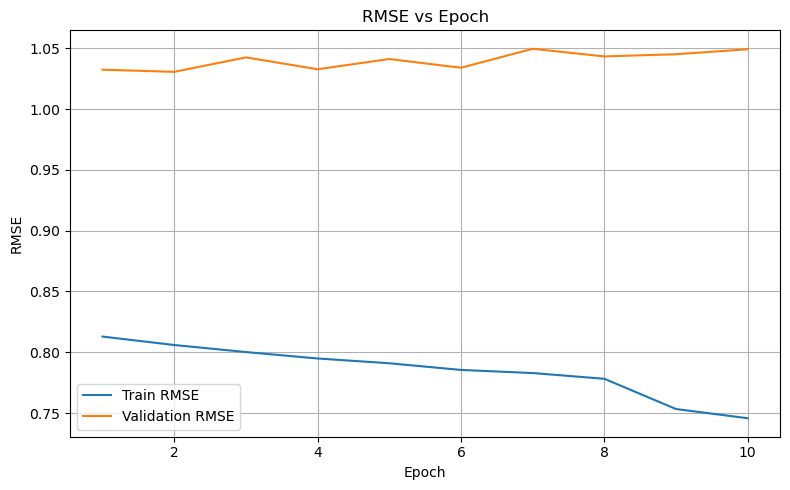

In [40]:
# Plot RMSE vs Epoch
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_rmse_list)+1), train_rmse_list, label="Train RMSE")
plt.plot(range(1, len(val_rmse_list)+1), val_rmse_list, label="Validation RMSE")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("RMSE vs Epoch")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Testing and Evaluation

In [42]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Re-initialize model
model = MGATAFModel().to(device)

# Load best saved weights
model.load_state_dict(torch.load("models/mgataf_best_model.pt"))
model.eval()

/tmp/ipykernel_2910/586474957.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("models/mgataf_best_model.pt"))


MGATAFModel(
  (drug_encoder): DrugGraphEncoder(
    (gats): ModuleList(
      (0): GATConv(55, 128, heads=4)
      (1-2): 2 x GATConv(128, 128, heads=4)
    )
    (att_proj): Linear(in_features=128, out_features=1, bias=True)
  )
  (fp_encoder): FingerprintEncoder(
    (conv): Sequential(
      (0): Conv1d(1, 32, kernel_size=(8,), stride=(4,))
      (1): ReLU()
      (2): Conv1d(32, 64, kernel_size=(4,), stride=(2,))
      (3): ReLU()
    )
    (fc): Sequential(
      (0): Flatten(start_dim=1, end_dim=-1)
      (1): Linear(in_features=16256, out_features=128, bias=True)
      (2): ReLU()
    )
  )
  (ccl_encoder): CellLineEncoder(
    (conv): Sequential(
      (0): Conv1d(1, 32, kernel_size=(8,), stride=(4,))
      (1): ReLU()
      (2): Conv1d(32, 64, kernel_size=(4,), stride=(2,))
      (3): ReLU()
    )
    (fc): Sequential(
      (0): Flatten(start_dim=1, end_dim=-1)
      (1): Linear(in_features=5760, out_features=128, bias=True)
      (2): ReLU()
    )
  )
  (fusion): AdaptiveFu

In [43]:
from sklearn.metrics import root_mean_squared_error
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

all_preds = []
all_labels = []

with torch.no_grad():
    for graph_data, fingerprint, ccl_feat, label in test_loader:
        graph_data = graph_data.to(device)
        fingerprint = fingerprint.to(device)
        ccl_feat = ccl_feat.to(device)
        label = label.to(device)

        preds = model(graph_data, fingerprint, ccl_feat)
        all_preds.append(preds.cpu().numpy())
        all_labels.append(label.cpu().numpy())

# Flatten predictions and labels
y_pred = np.concatenate(all_preds).flatten()
y_true = np.concatenate(all_labels).flatten()

# Compute metrics
test_rmse = root_mean_squared_error(y_true, y_pred)
test_pcc = pearsonr(y_true, y_pred)[0]

print(f"✅ Test RMSE: {test_rmse:.4f}")
print(f"✅ Test PCC:  {test_pcc:.4f}")


✅ Test RMSE: 1.0351
✅ Test PCC:  0.9317
